In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'gaussian_beam', 'stats')

In [3]:
gt = torch.load(os.path.join(dr, 'gaussian_beam.pt')).numpy_particles()

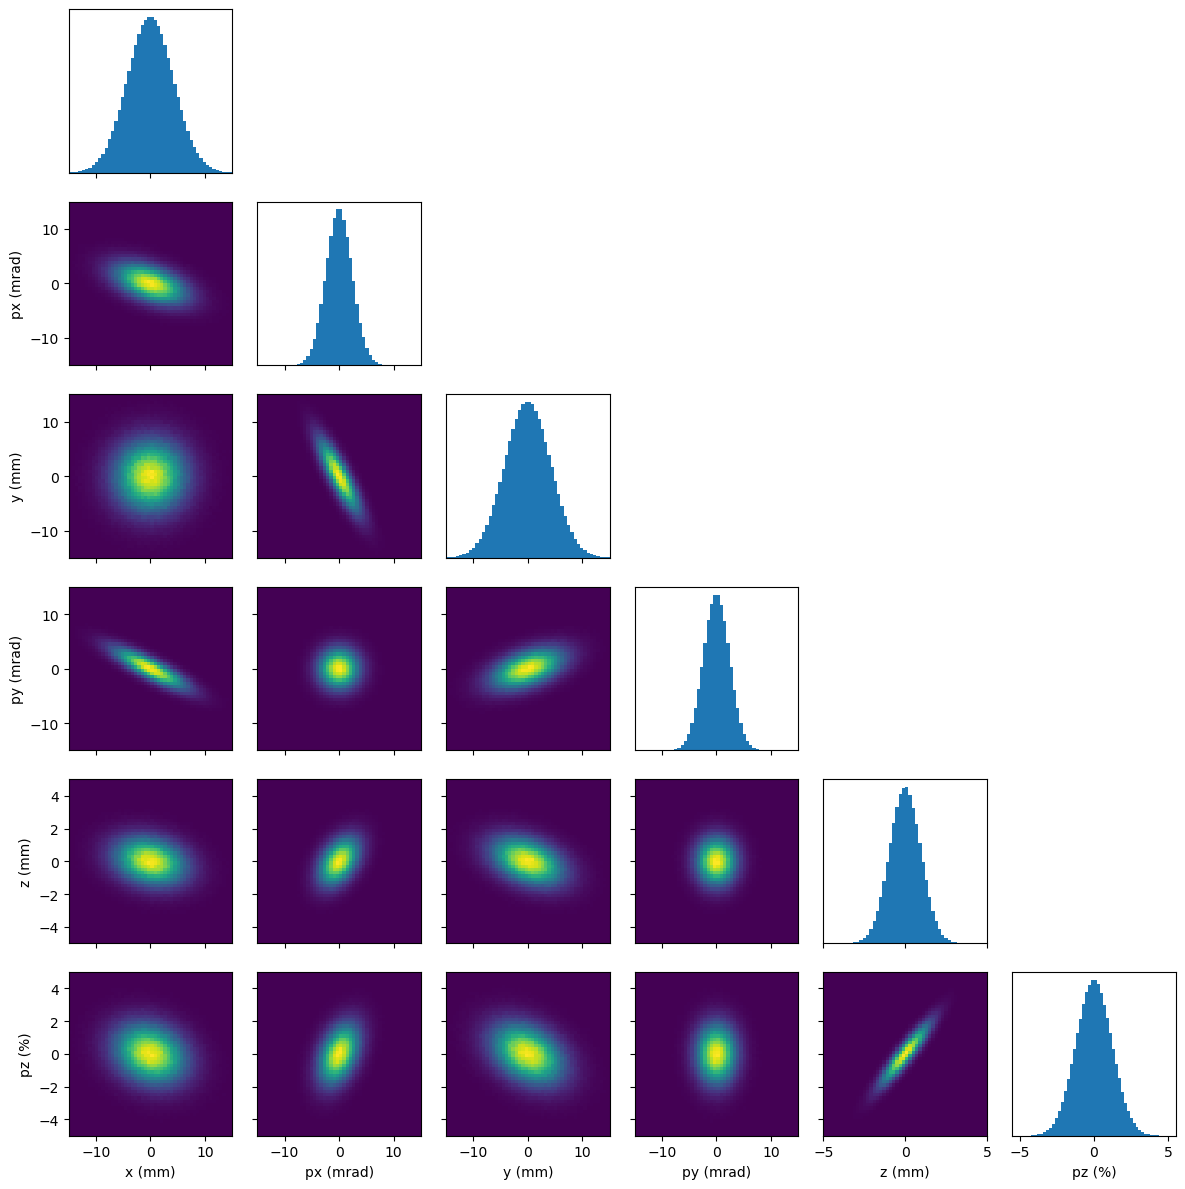

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-5e-3,5e-3],
    [-5e-2,5e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 100
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

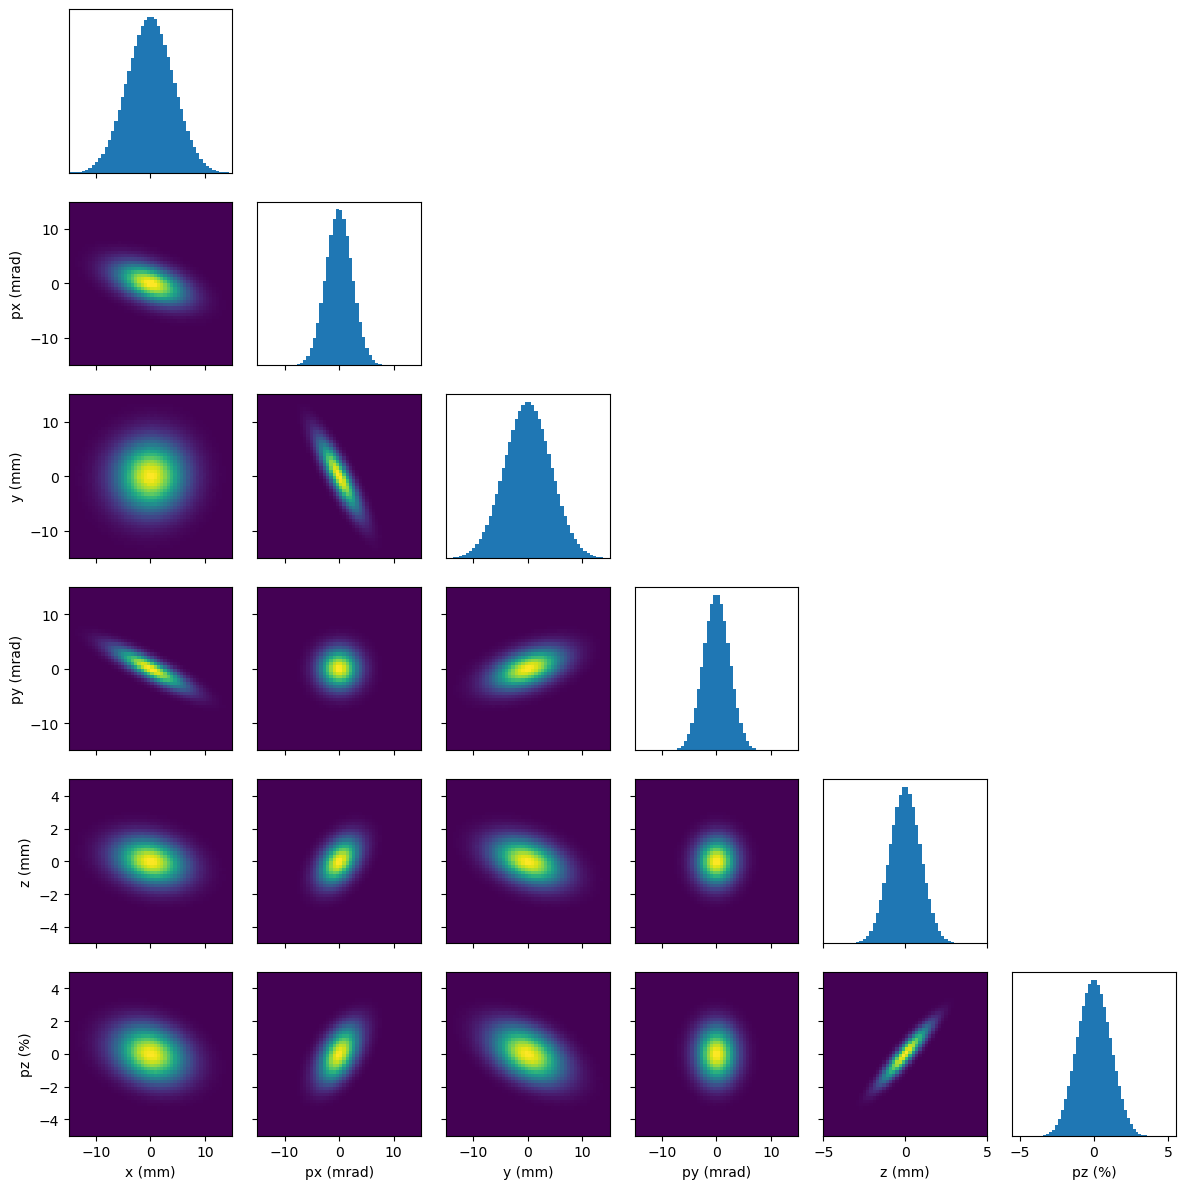

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

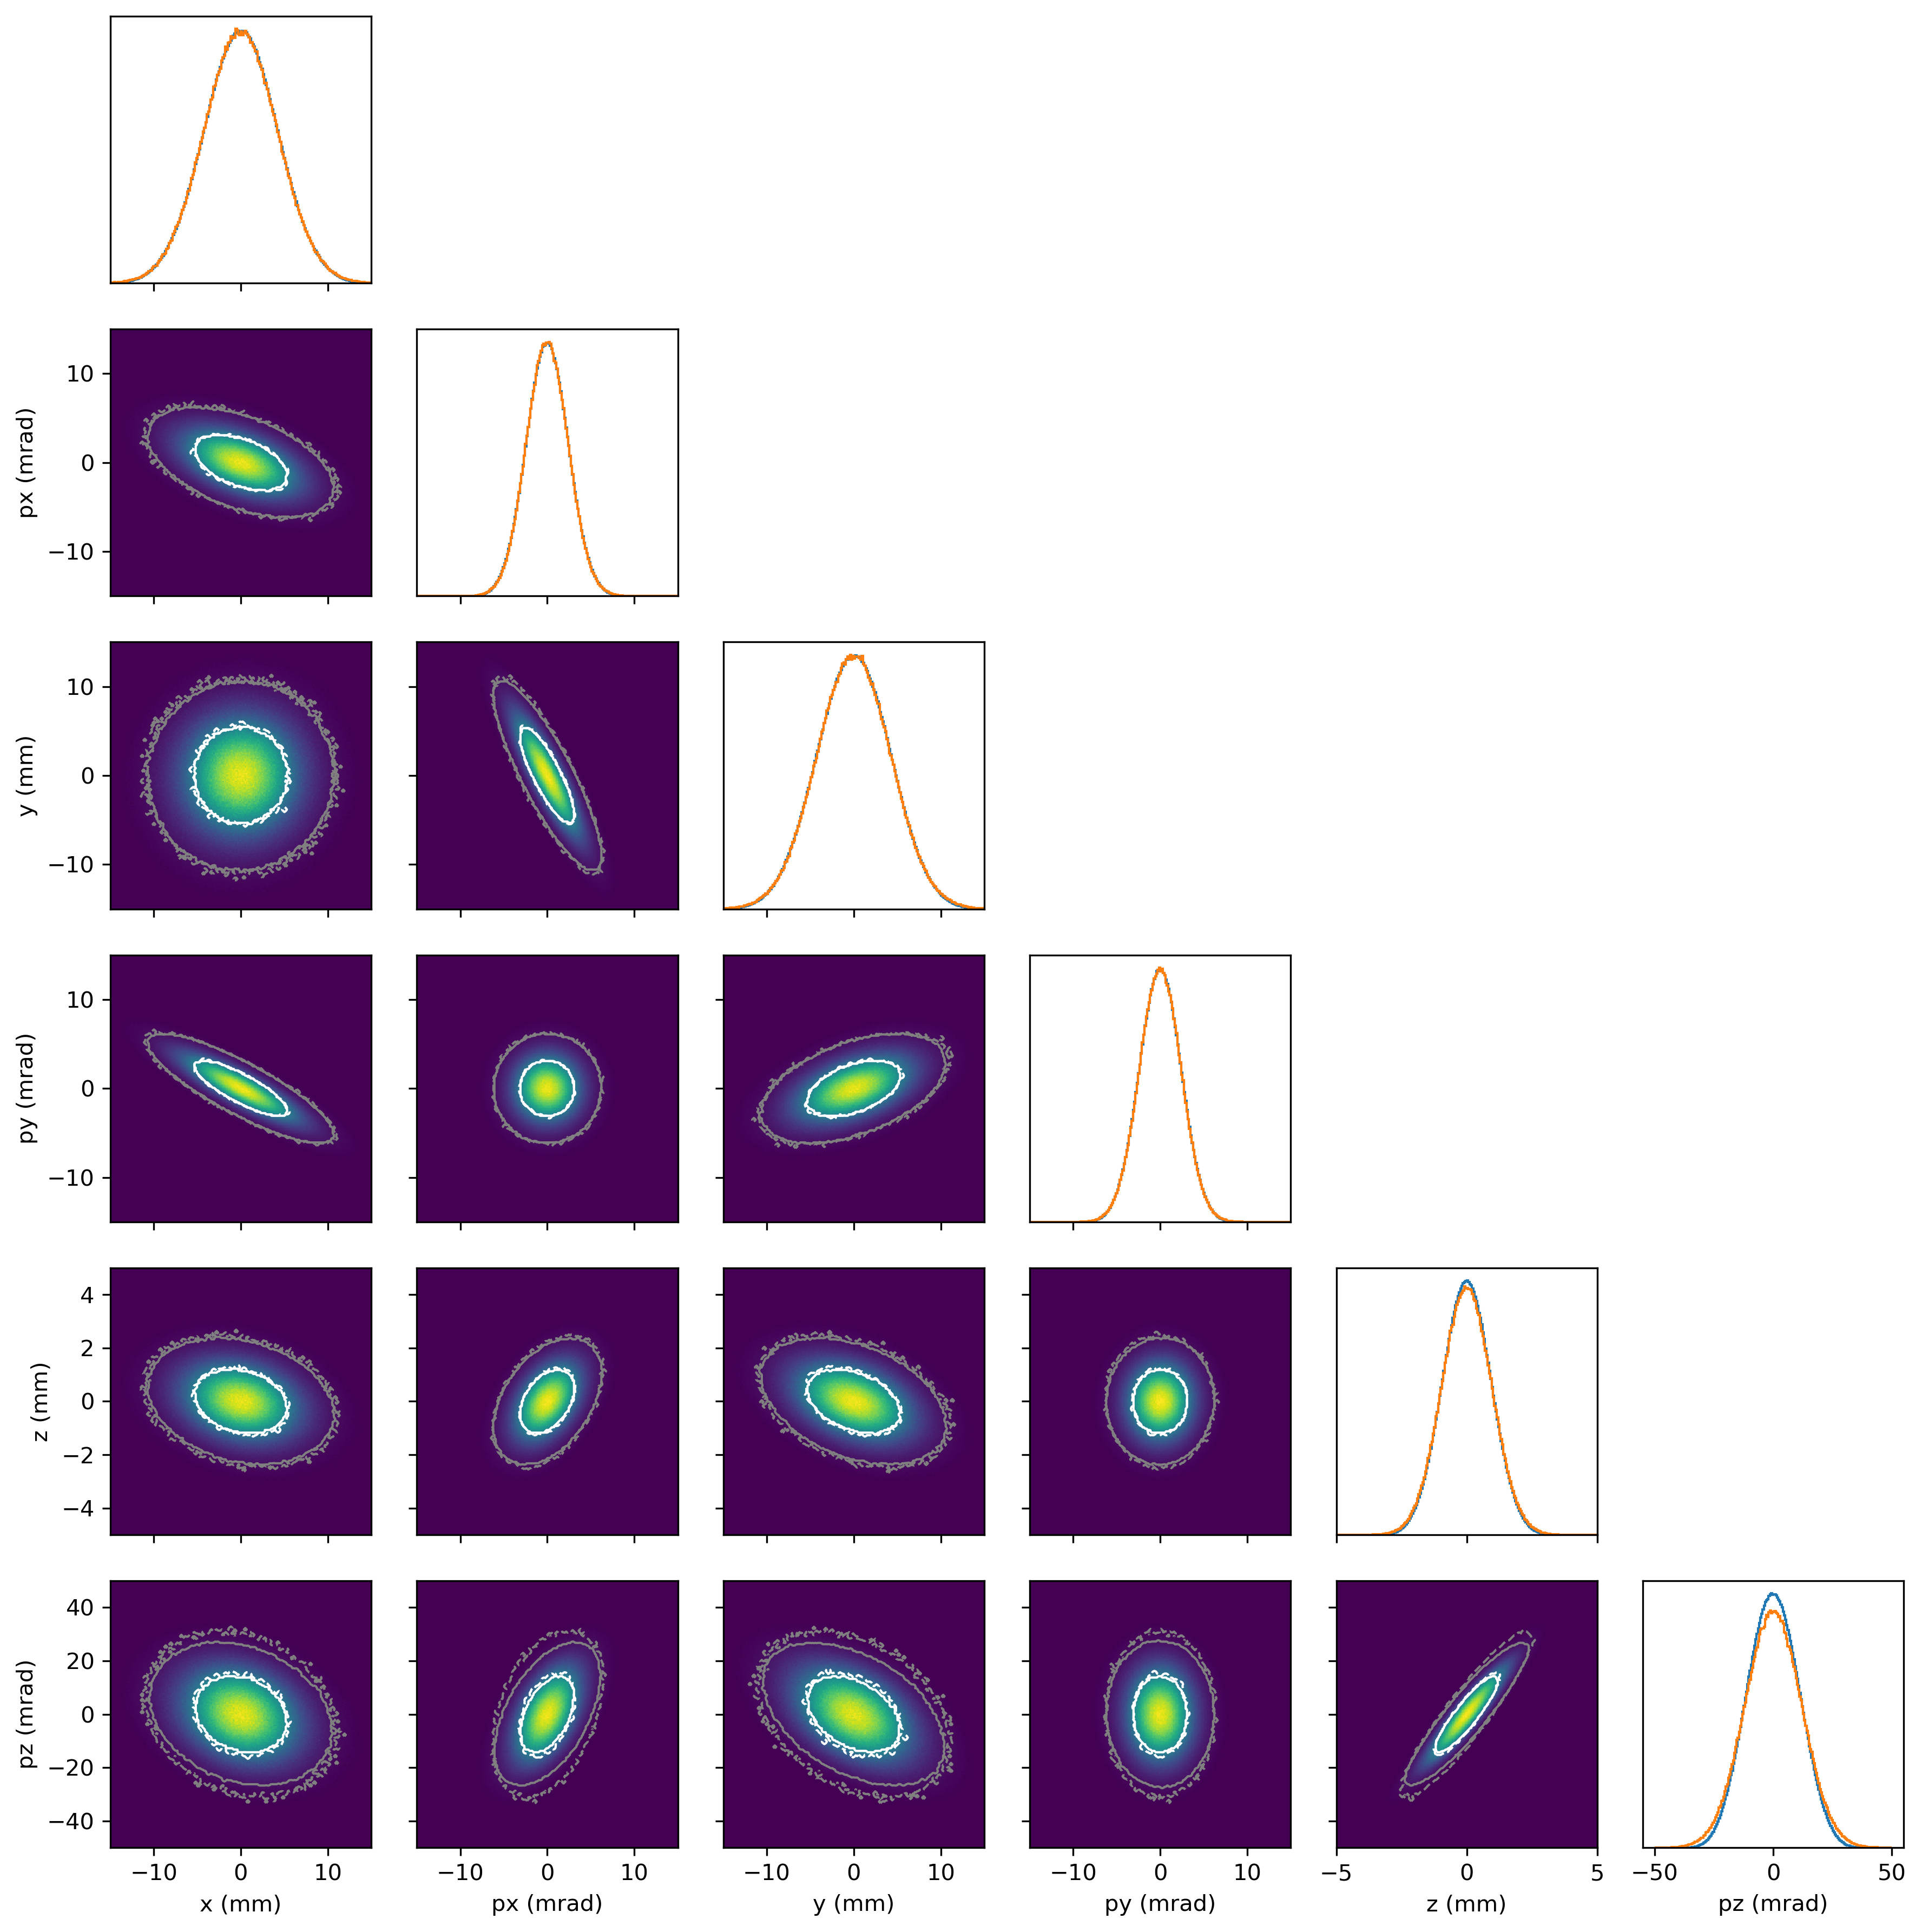

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 1.01e+01 -2.79e+00 -1.62e-02 -4.85e+00 -4.89e-01 -5.65e+00]
 [-2.79e+00  3.23e+00 -4.85e+00 -4.42e-03  5.47e-01  6.31e+00]
 [-1.62e-02 -4.85e+00  1.01e+01  2.81e+00 -8.53e-01 -9.85e+00]
 [-4.85e+00 -4.42e-03  2.81e+00  3.24e+00 -1.56e-03 -1.73e-02]
 [-4.89e-01  5.47e-01 -8.53e-01 -1.56e-03  5.11e-01  5.89e+00]
 [-5.65e+00  6.31e+00 -9.85e+00 -1.73e-02  5.89e+00  7.98e+01]]

reconstruction avg: 
[[ 1.06e+01 -2.98e+00  1.28e-01 -5.18e+00 -5.18e-01 -6.27e+00]
 [-2.98e+00  3.45e+00 -5.25e+00 -1.96e-02  5.86e-01  7.96e+00]
 [ 1.28e-01 -5.25e+00  1.07e+01  2.94e+00 -8.82e-01 -1.15e+01]
 [-5.18e+00 -1.96e-02  2.94e+00  3.43e+00  2.99e-02 -1.34e-01]
 [-5.18e-01  5.86e-01 -8.82e-01  2.99e-02  5.18e-01  5.68e+00]
 [-6.27e+00  7.96e+00 -1.15e+01 -1.34e-01  5.68e+00  7.37e+01]]

reconstruction std: 
[[0.69 0.3  0.49 0.37 0.1  1.35]
 [0.3  0.23 0.38 0.15 0.06 0.81]
 [0.49 0.38 0.75 0.33 0.12 1.78]
 [0.37 0.15 0.33 0.24 0.08 0.88]
 [0.1  0.06 0.12 0.08 0.05 0.57]
 [1.35 0.81 1.78 0

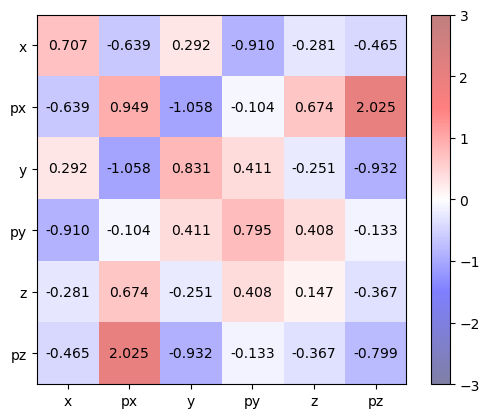

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 1.65e+01 -4.60e+00  6.82e-03 -7.96e+00 -8.06e-01 -9.31e+00]
 [-4.60e+00  5.31e+00 -7.95e+00  3.93e-03  8.97e-01  1.03e+01]
 [ 6.82e-03 -7.95e+00  1.65e+01  4.58e+00 -1.40e+00 -1.61e+01]
 [-7.96e+00  3.93e-03  4.58e+00  5.31e+00 -7.37e-04  4.19e-03]
 [-8.06e-01  8.97e-01 -1.40e+00 -7.37e-04  8.39e-01  9.67e+00]
 [-9.31e+00  1.03e+01 -1.61e+01  4.19e-03  9.67e+00  1.31e+02]]

reconstruction avg: 
[[ 1.63e+01 -4.63e+00  2.43e-01 -8.01e+00 -8.12e-01 -9.91e+00]
 [-4.63e+00  5.34e+00 -8.09e+00 -1.95e-02  9.05e-01  1.25e+01]
 [ 2.43e-01 -8.09e+00  1.64e+01  4.50e+00 -1.38e+00 -1.84e+01]
 [-8.01e+00 -1.95e-02  4.50e+00  5.29e+00  4.91e-02 -2.19e-01]
 [-8.12e-01  9.05e-01 -1.38e+00  4.91e-02  7.90e-01  8.57e+00]
 [-9.91e+00  1.25e+01 -1.84e+01 -2.19e-01  8.57e+00  1.09e+02]]

reconstruction std: 
[[0.57 0.3  0.48 0.3  0.11 1.33]
 [0.3  0.22 0.35 0.15 0.07 0.95]
 [0.48 0.35 0.68 0.31 0.14 1.96]
 [0.3  0.15 0.31 0.22 0.08 0.87]
 [0.11 0.07 0.14 0.08 0.06 0.67]
 [1.33 0.95 1.96 0

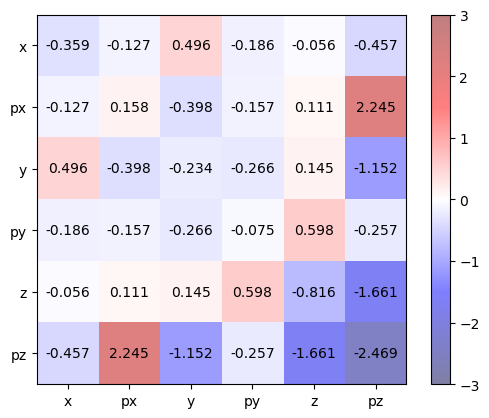

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 18.01  -5.01   0.01  -8.67  -0.88 -10.13]
 [ -5.01   5.78  -8.66   0.01   0.98  11.25]
 [  0.01  -8.66  17.99   4.99  -1.52 -17.54]
 [ -8.67   0.01   4.99   5.78  -0.     0.  ]
 [ -0.88   0.98  -1.52  -0.     0.91  10.53]
 [-10.13  11.25 -17.54   0.    10.53 142.65]]

reconstruction avg: 
[[ 17.55  -4.98   0.27  -8.61  -0.88 -10.69]
 [ -4.98   5.73  -8.66  -0.01   0.97  13.45]
 [  0.27  -8.66  17.48   4.81  -1.49 -19.94]
 [ -8.61  -0.01   4.81   5.68   0.05  -0.26]
 [ -0.88   0.97  -1.49   0.05   0.84   9.13]
 [-10.69  13.45 -19.94  -0.26   9.13 115.48]]

reconstruction std: 
[[0.57 0.29 0.44 0.29 0.11 1.37]
 [0.29 0.2  0.32 0.14 0.07 0.94]
 [0.44 0.32 0.62 0.27 0.13 1.83]
 [0.29 0.14 0.27 0.2  0.09 0.85]
 [0.11 0.07 0.13 0.09 0.06 0.67]
 [1.37 0.94 1.83 0.85 0.67 9.1 ]]

reconstruction relative uncertainty: 
[[  0.03  -0.06   1.62  -0.03  -0.13  -0.13]
 [ -0.06   0.04  -0.04 -12.85   0.07   0.07]
 [  1.62  -0.04   0.04   0.06  -0.09  -0.09]
 [ -0.03 -12.85   0.06   0

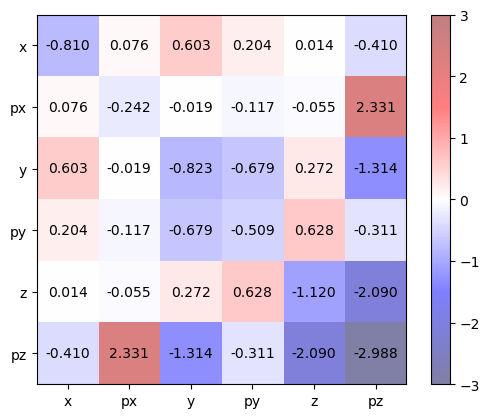

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)